# Day 08. Exercise 05
# Clustering

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [2]:
df = pd.read_csv('../data/regression.csv')
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,-64.400000
1,user_10,20,89.0,-74.800000
2,user_14,61,143.0,-159.000000
3,user_17,51,47.0,-61.600000
4,user_18,5,3.0,-5.666667
5,user_19,118,16.0,-98.750000
6,user_21,65,10.0,-95.500000
7,user_25,79,179.0,-92.600000
8,user_28,60,149.0,-86.400000
9,user_3,18,317.0,-105.400000


In [3]:
df.drop(columns='pageviews', inplace=True)
df

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667
5,user_19,118,-98.750000
6,user_21,65,-95.500000
7,user_25,79,-92.600000
8,user_28,60,-86.400000
9,user_3,18,-105.400000


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [4]:
X = df[['num_commits', 'AVG(diff)']]
kmeans_model = KMeans(random_state=21, n_clusters=3)
kmeans_clusters = kmeans_model.fit_predict(X)

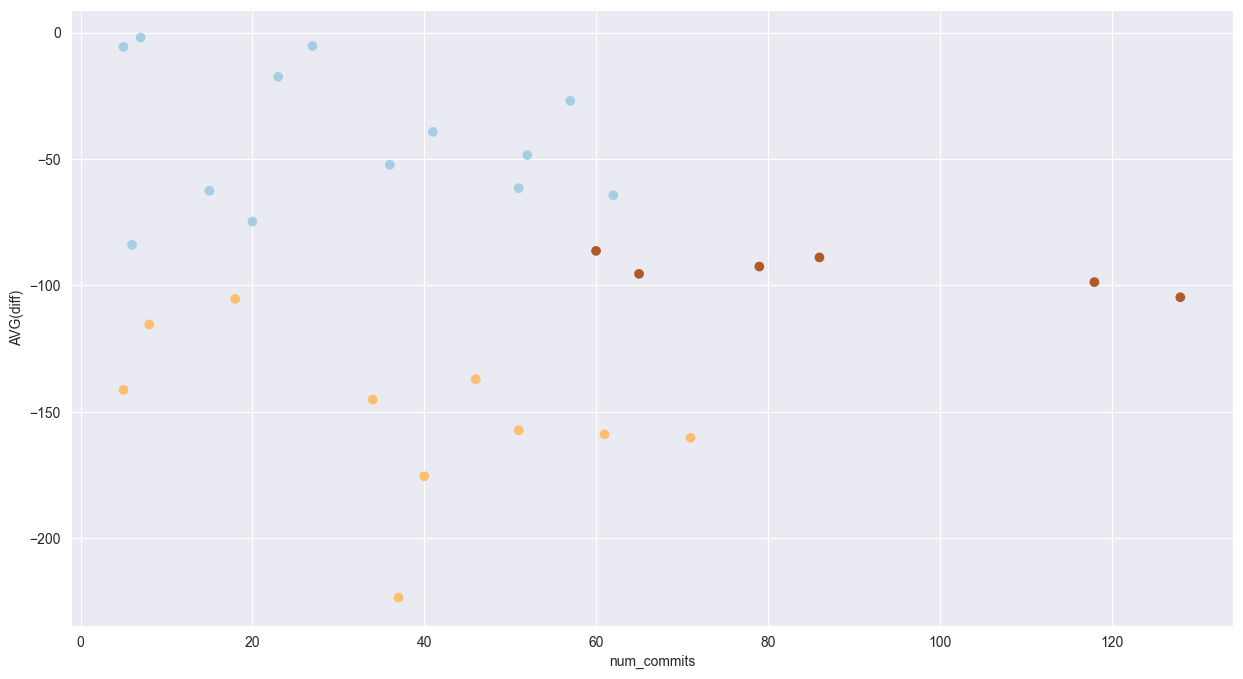

In [5]:
plt.figure(figsize=(15, 8))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=kmeans_clusters, cmap='Paired')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.grid(True)
plt.show()

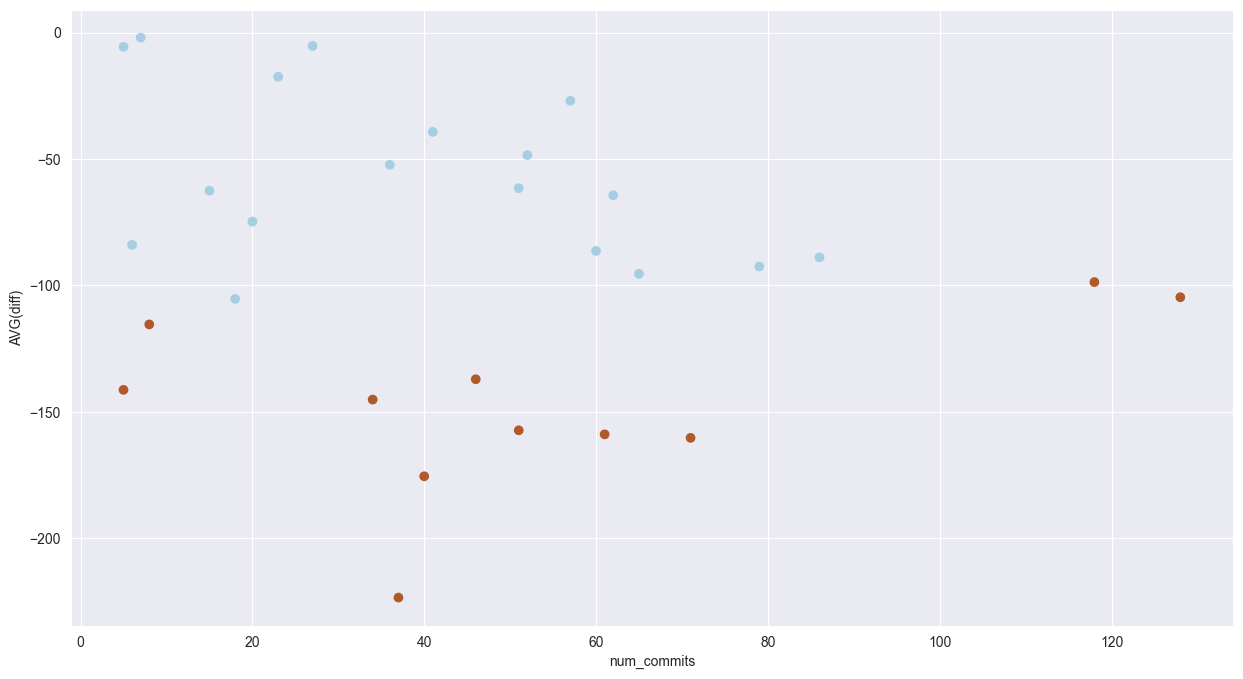

In [6]:
kmeans_model = KMeans(random_state=21, n_clusters=2)
kmeans_clusters = kmeans_model.fit_predict(X)

plt.figure(figsize=(15, 8))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=kmeans_clusters, cmap='Paired')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.grid(True)
plt.show()

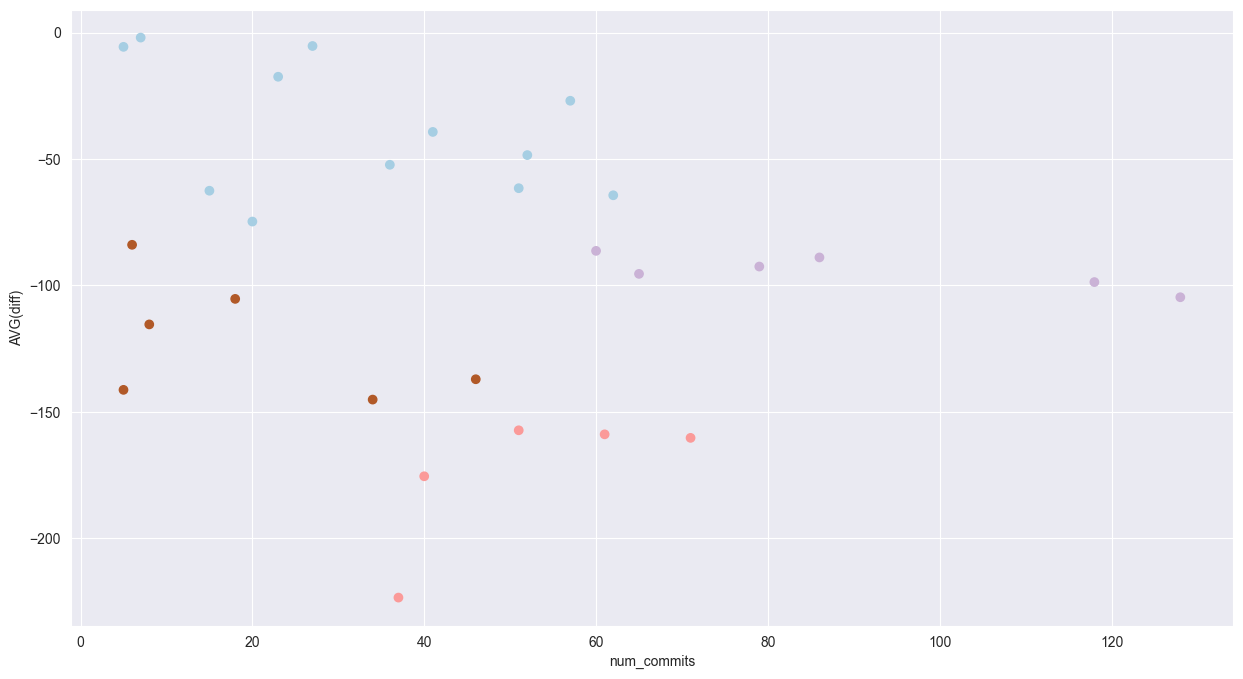

In [7]:
kmeans_model = KMeans(random_state=21, n_clusters=4)
kmeans_clusters = kmeans_model.fit_predict(X)

plt.figure(figsize=(15, 8))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=kmeans_clusters, cmap='Paired')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.grid(True)
plt.show()

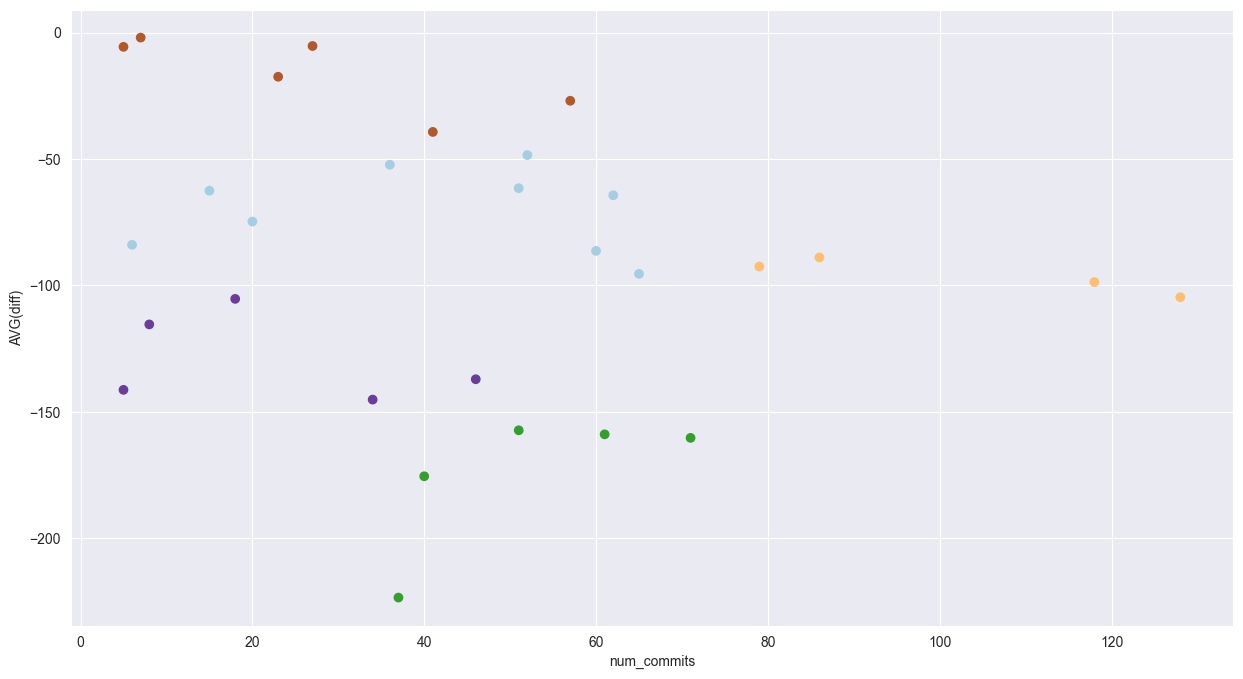

In [8]:
kmeans_model = KMeans(random_state=21, n_clusters=5)
kmeans_clusters = kmeans_model.fit_predict(X)

plt.figure(figsize=(15, 8))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=kmeans_clusters, cmap='Paired')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.grid(True)
plt.show()

In [9]:
silhouette_score(X, kmeans_clusters)

np.float64(0.3521030626149593)

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [10]:
dbscan_model = DBSCAN(eps=20, min_samples=2)
dbscan_clusters = dbscan_model.fit_predict(X)

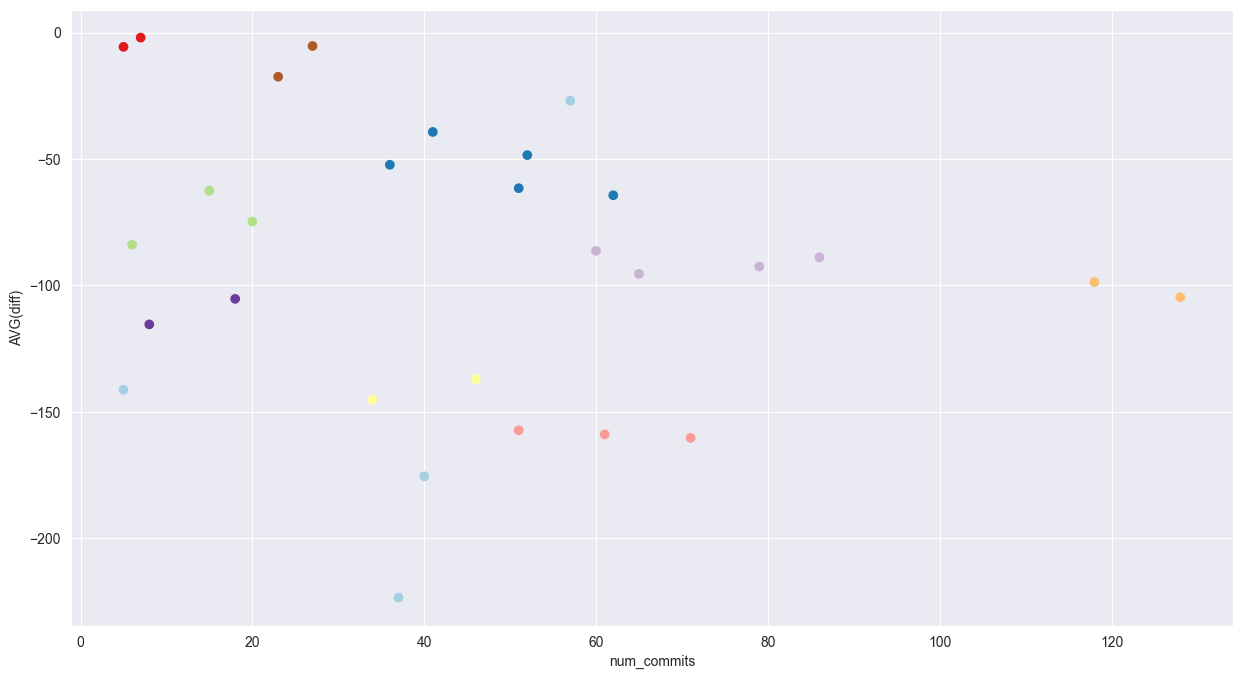

In [11]:
plt.figure(figsize=(15, 8))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=dbscan_clusters, cmap='Paired')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

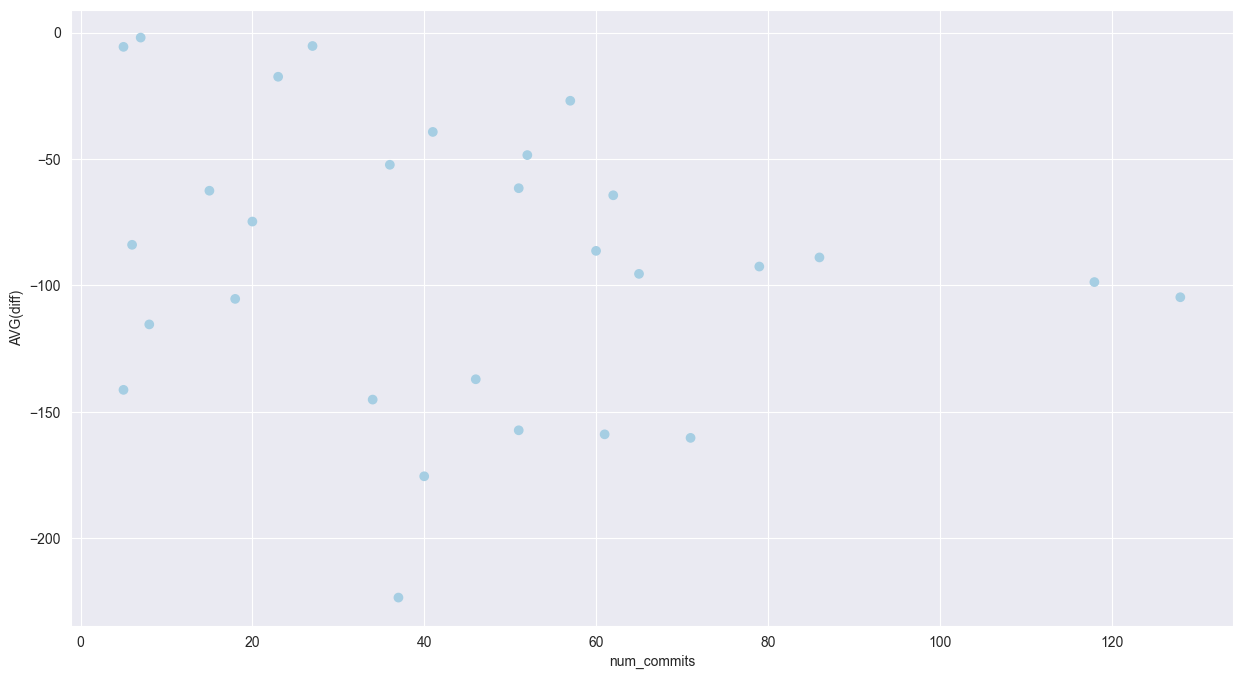

In [12]:
dbscan_model = DBSCAN(eps=10, min_samples=3)
dbscan_clusters = dbscan_model.fit_predict(X)

plt.figure(figsize=(15, 8))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=dbscan_clusters, cmap='Paired')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

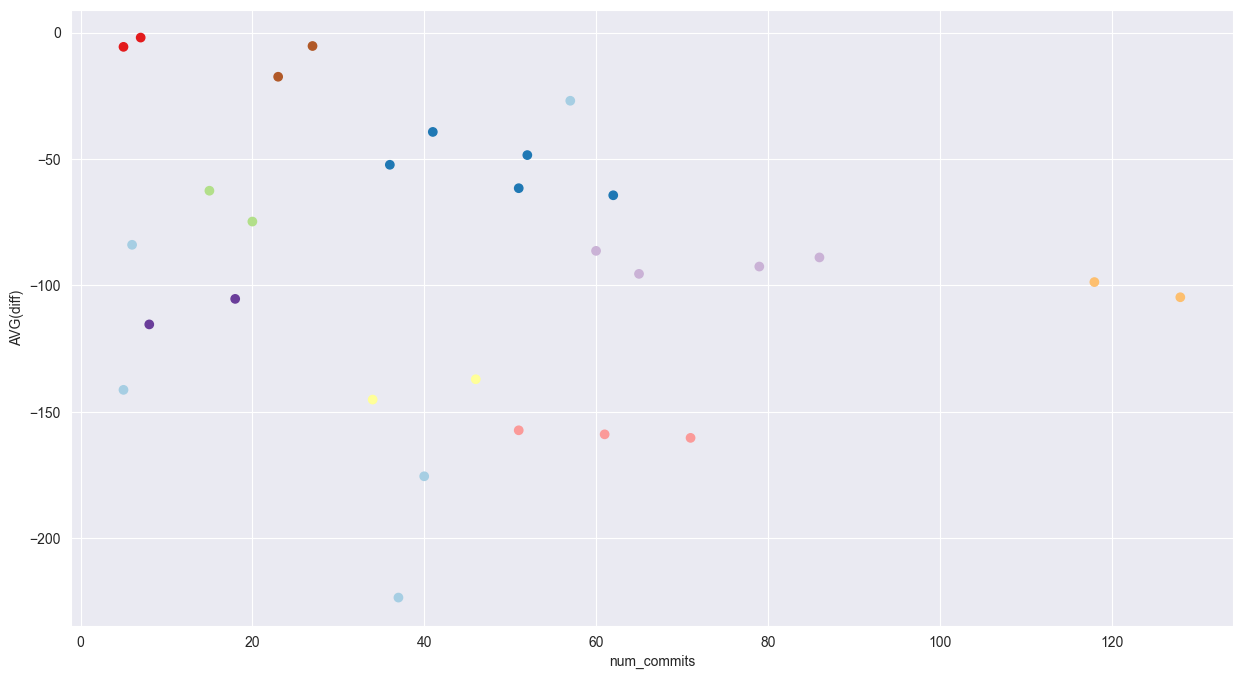

In [13]:
dbscan_model = DBSCAN(eps=15, min_samples=2)
dbscan_clusters = dbscan_model.fit_predict(X)

plt.figure(figsize=(15, 8))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=dbscan_clusters, cmap='Paired')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

In [14]:
silhouette_score(X, dbscan_clusters)

np.float64(0.3469844857581226)

In [15]:
dbscan_model = DBSCAN(eps=20, min_samples=2)
dbscan_clusters = dbscan_model.fit_predict(X)
silhouette_score(X, dbscan_clusters)

np.float64(0.38339641455696616)

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [16]:
aggl_model = AgglomerativeClustering(n_clusters=5)
aggl_clusters = aggl_model.fit_predict(X)

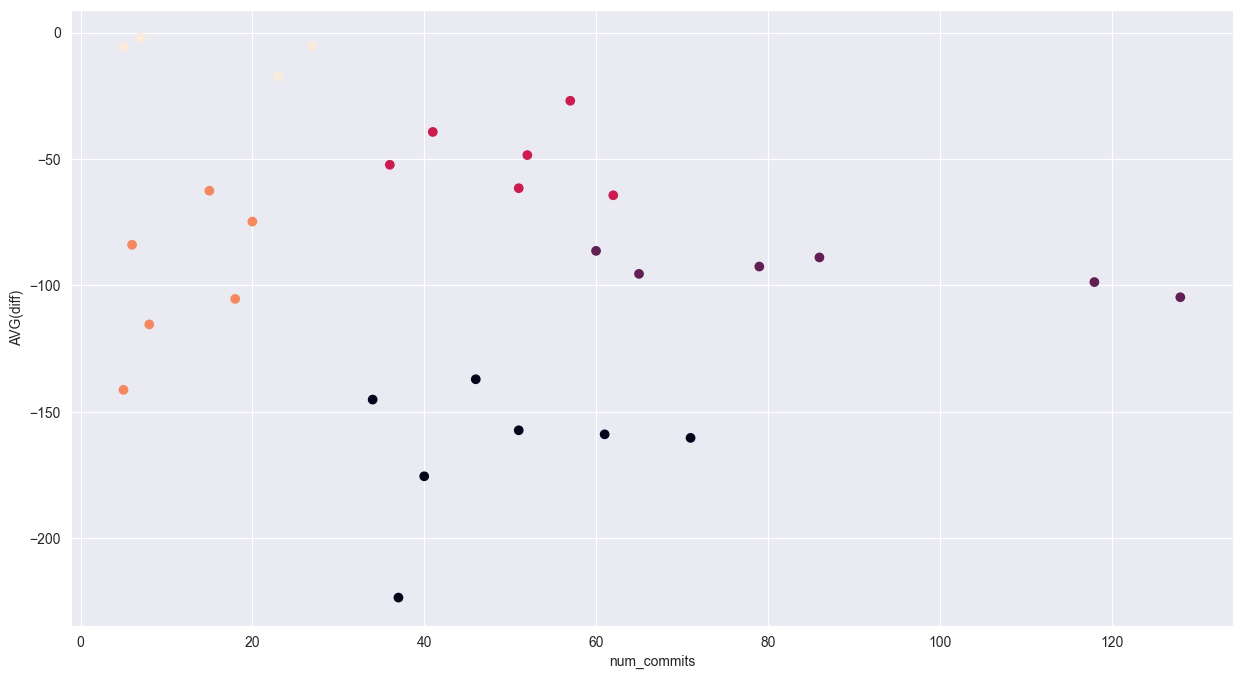

In [17]:
plt.figure(figsize=(15, 8))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=aggl_clusters)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

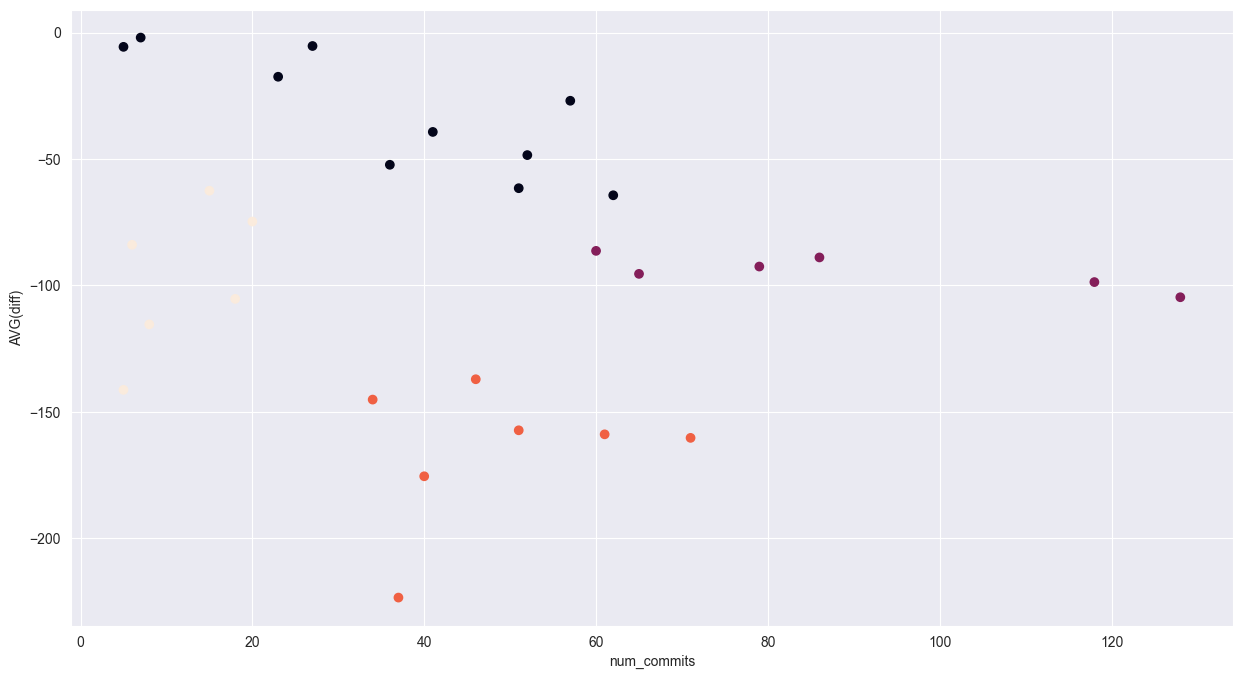

In [18]:
aggl_model = AgglomerativeClustering(n_clusters=4)
aggl_clusters = aggl_model.fit_predict(X)

plt.figure(figsize=(15, 8))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=aggl_clusters)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

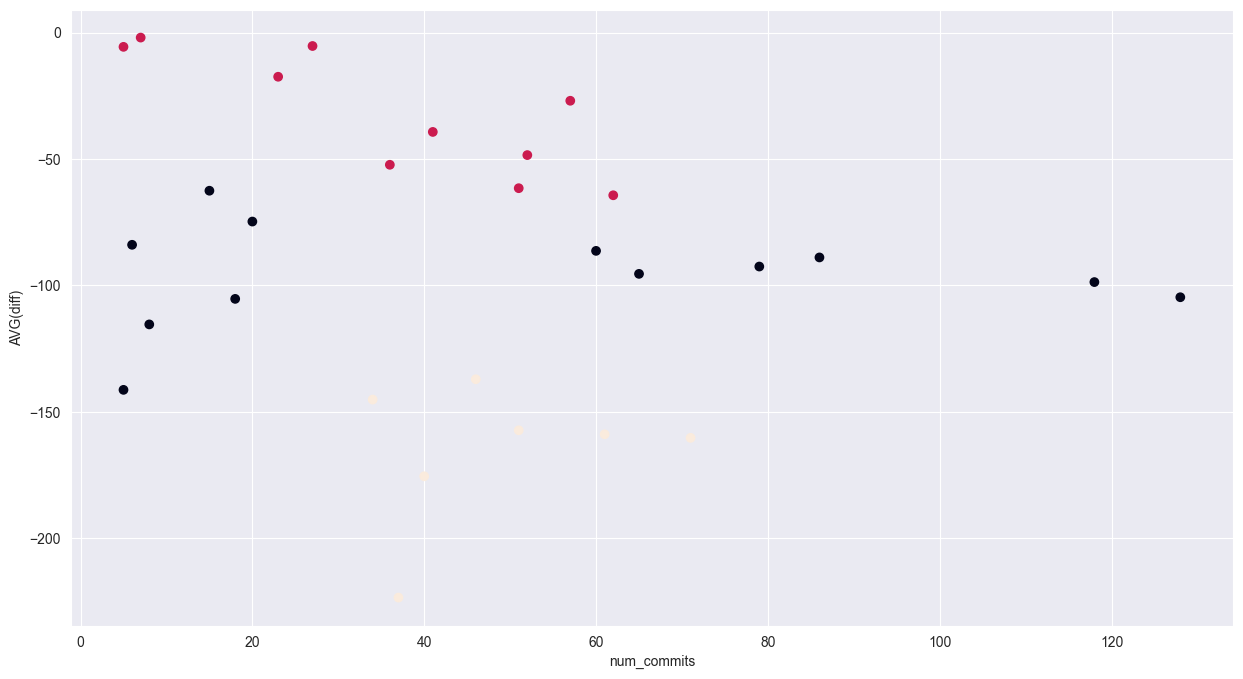

In [19]:
aggl_model = AgglomerativeClustering(n_clusters=3)
aggl_clusters = aggl_model.fit_predict(X)

plt.figure(figsize=(15, 8))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=aggl_clusters)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

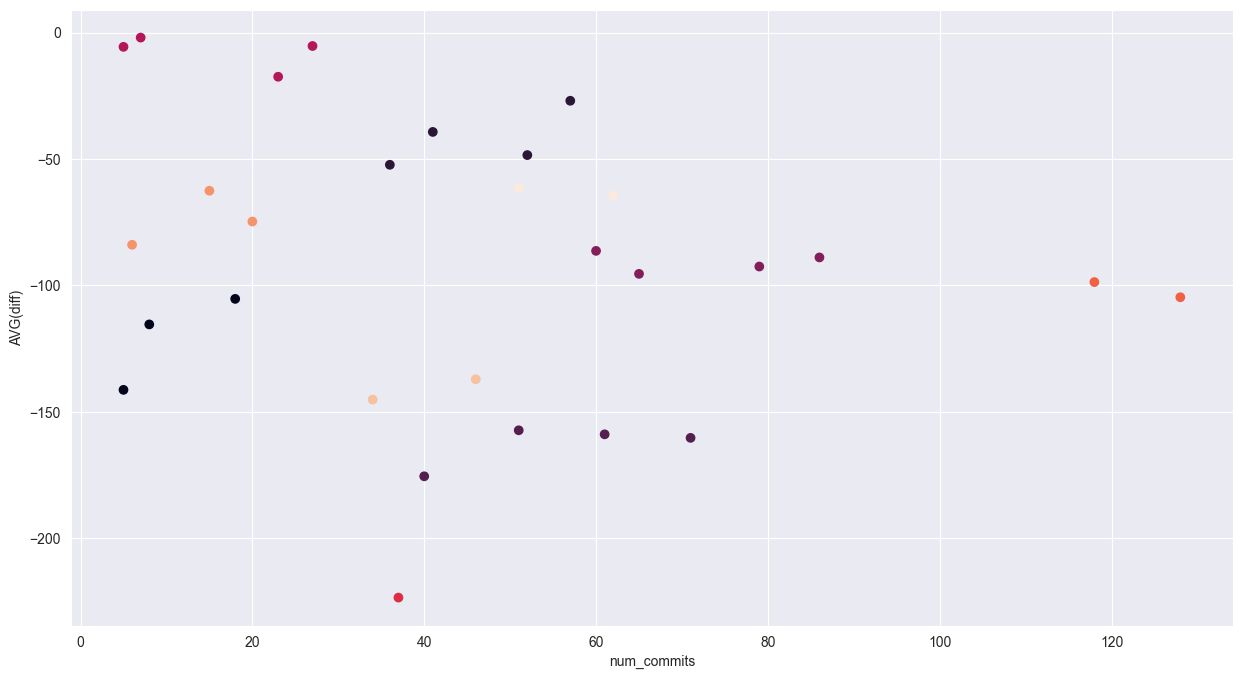

In [20]:
aggl_model = AgglomerativeClustering(n_clusters=10)
aggl_clusters = aggl_model.fit_predict(X)

plt.figure(figsize=(15, 8))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=aggl_clusters)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

In [21]:
silhouette_score(X, aggl_clusters)

np.float64(0.431193930539333)

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [22]:
def param_optimization(model_class, param_name, param_range, X, fixed_params=None):
    if fixed_params is None:
        fixed_params = {}
    scores = []
    all_labels = []

    for val in param_range:
        params = fixed_params.copy()
        params[param_name] = val

        model = model_class(**params)
        labels = model.fit_predict(X)

        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
        else:
            score = -1

        scores.append(score)
        all_labels.append(labels)

    best_idx = int(np.argmax(scores))
    best_val = param_range[best_idx]
    best_labels = all_labels[best_idx]

    fig, axes = plt.subplots(1, 2, figsize=(15, 8))
    axes[0].plot(param_range, scores, marker='o')
    axes[0].set_xlabel(param_name)
    axes[0].set_ylabel('Silhouette Score')
    axes[0].set_title(f'Silhouette Score vs {param_name}')
    axes[0].grid(True)

    axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=best_labels, cmap='viridis', s=50)
    axes[1].set_title(f'Best clustering with {param_name} = {best_val}')
    axes[1].set_xlabel(X.columns[0])
    axes[1].set_ylabel(X.columns[1])
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

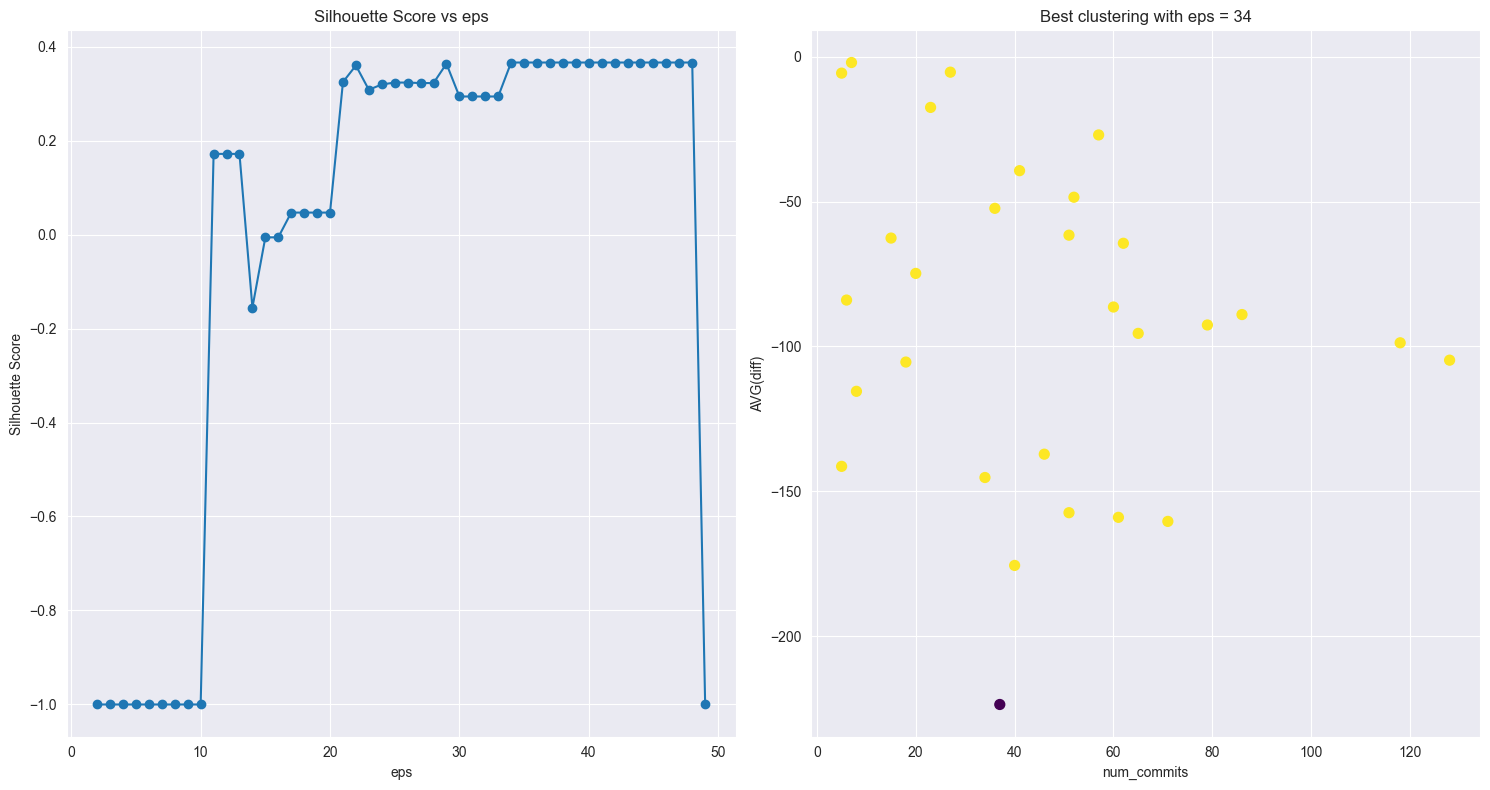

In [23]:
param_optimization(DBSCAN, param_name='eps', param_range=range(2, 50), X=X, fixed_params={'min_samples': 3})

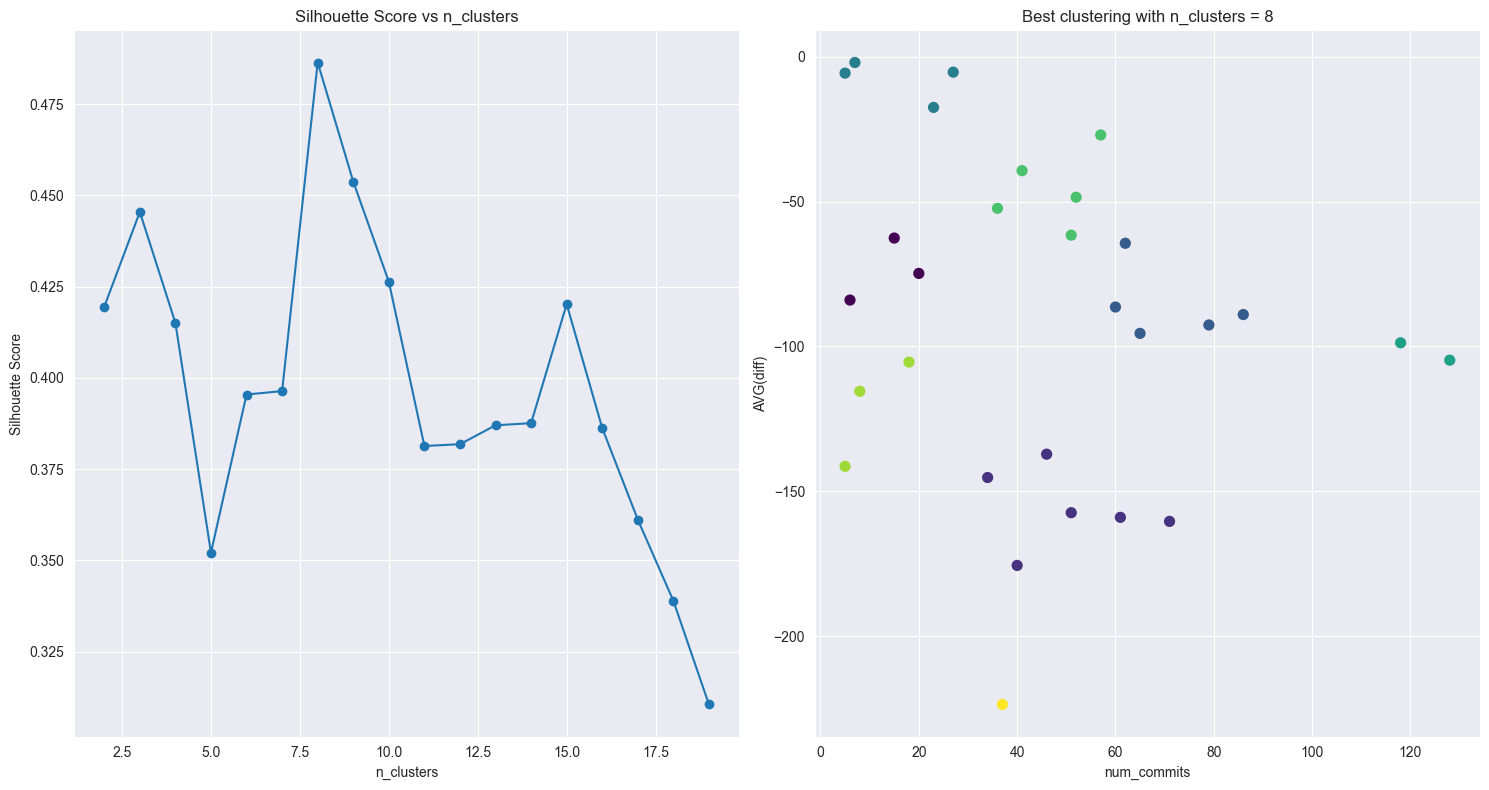

In [24]:
param_optimization(model_class=KMeans, param_name='n_clusters', param_range=range(2, 20), X=X, fixed_params={'random_state': 21})

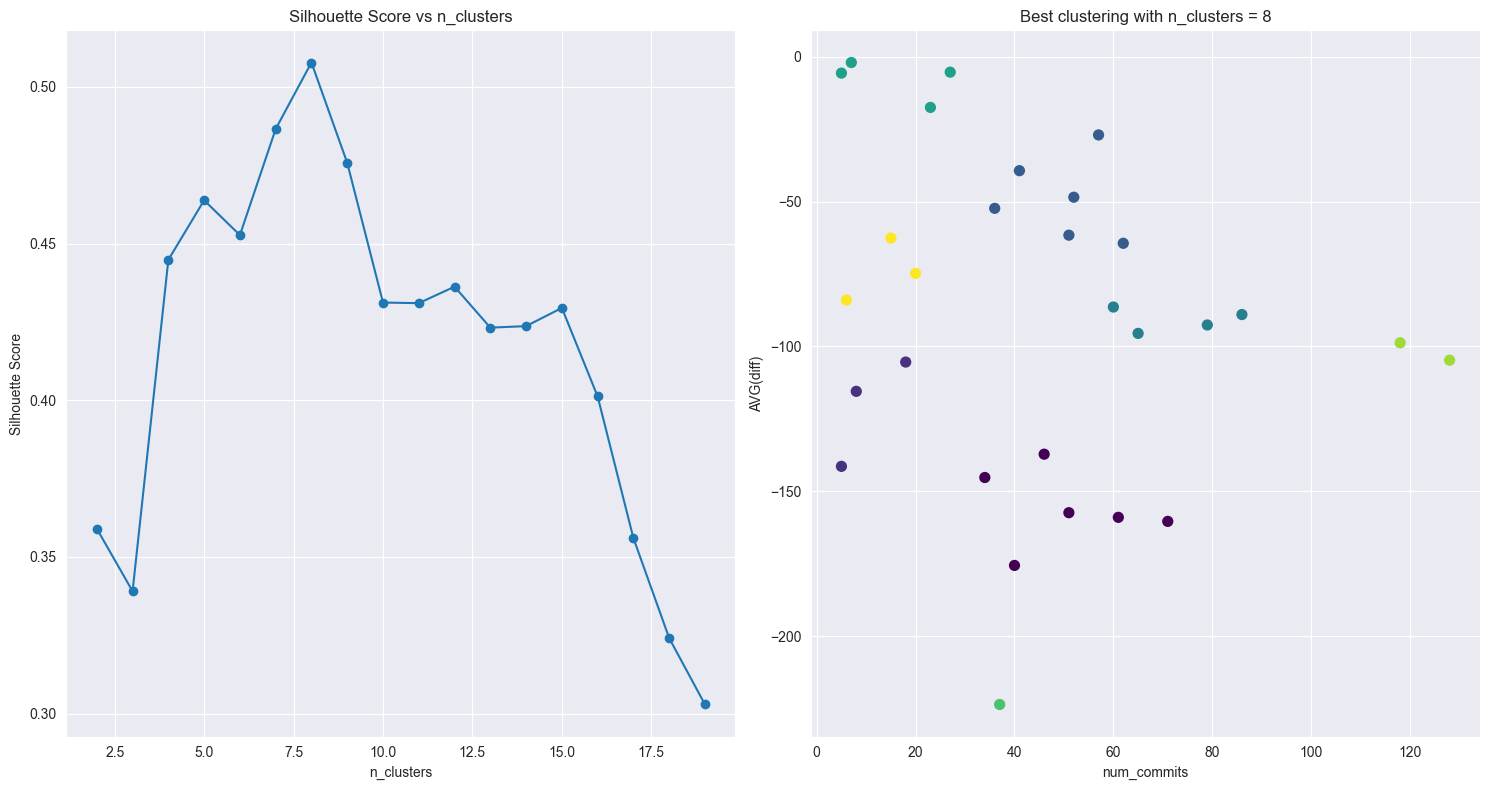

In [25]:
param_optimization(model_class=AgglomerativeClustering, param_name='n_clusters', param_range=range(2, 20), X=X)